<a href="https://colab.research.google.com/github/Ruvindya/Machine-Learning/blob/main/Nearest_Neighbors_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LAB05  -   2019/E/117

1. Load some data from python dataset or from UCI data repository.

In [123]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay



In [111]:
iris_data = load_iris()

In [112]:
df = pd.DataFrame(data=iris_data.data, columns=column_names[:-1])

# Add the target data as a new column in the DataFrame
df['species'] = iris_data.target

In [113]:
print("Combined Data:")
df.head(100)

Combined Data:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


df.head(10)

2. Preprocess your data and split it into training data and test data.

In [114]:
print("Data types: ")
df.dtypes

Data types: 


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
dtype: object

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


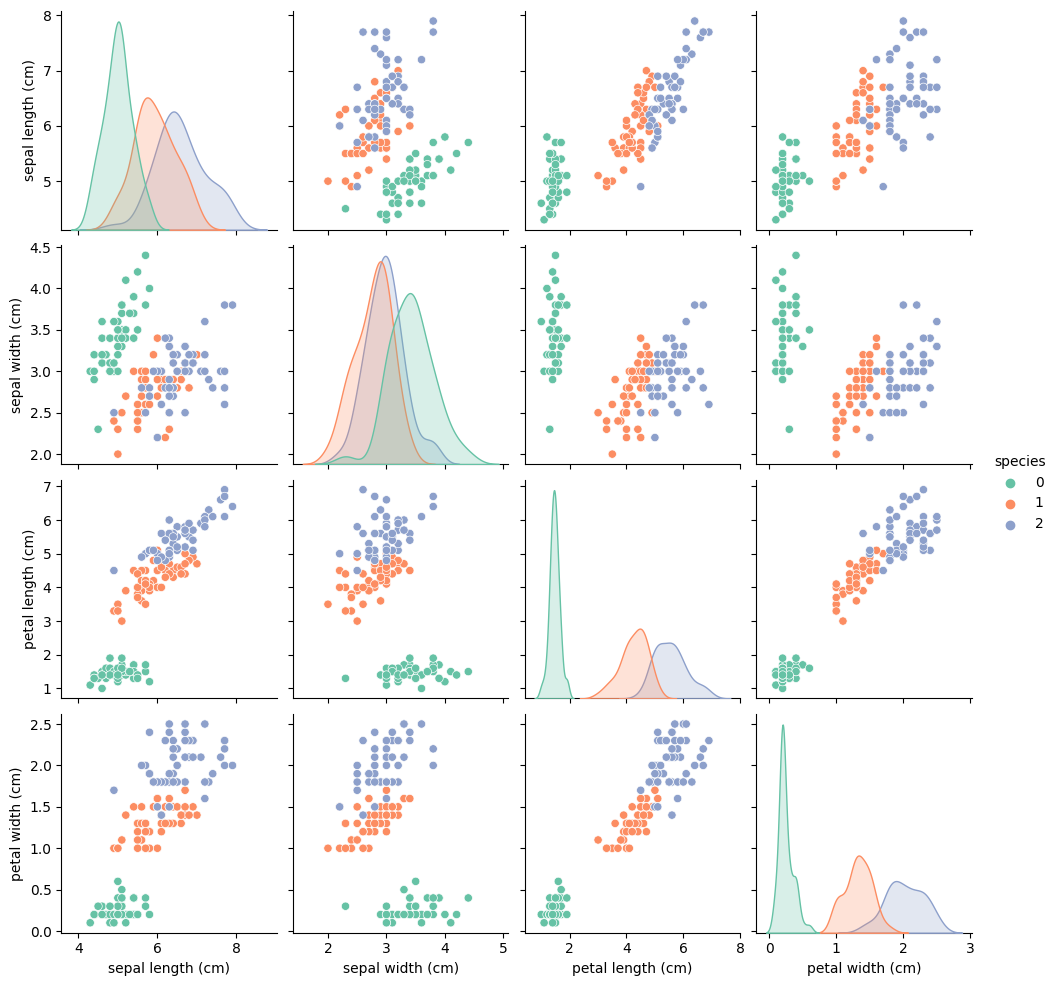

In [116]:
sns.pairplot(data=df,hue="species",palette="Set2")
plt.show()

In [146]:
# Get the features and target variable
X = iris_data.data[:, :2]
y = iris_data.target


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. Define number of neighbors for your algorithm and apply it on your data

In [148]:
#from sklearn.neighbors import NearestNeighbors
#nbrs = NearestNeighbors(n_neighbors = 2, algorithm = 'ball_tree')
#nbrs.fit(X,y)
#distances, indices = nbrs.kneighbors(X,y)
#indices

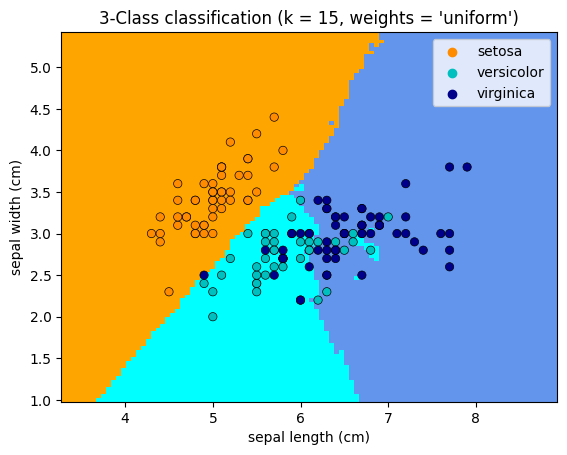

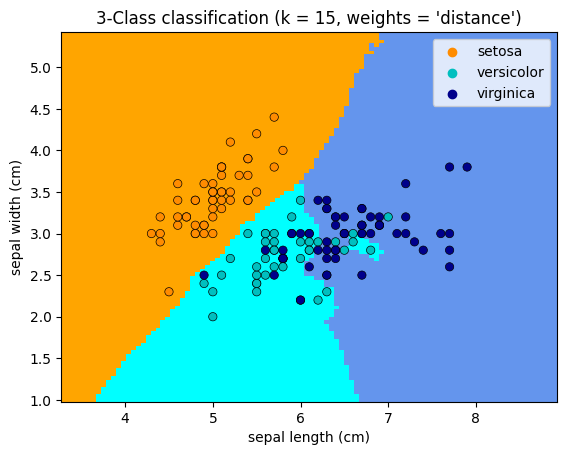

In [131]:
n_neighbors = 15

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

4. Apply your model on an unseen test data

In [149]:
# Make predictions on the test set
#y_pred = neighbors.predict(X_test)

5. Now plot your data and see your classified data

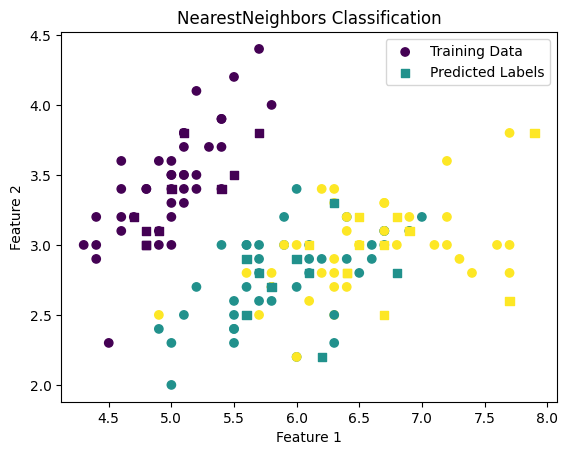

In [151]:
# Plot the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Training Data')

# Plot the test data with predicted labels
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='s', label='Predicted Labels')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('NearestNeighbors Classification')
plt.legend()
plt.show()

6. Use confusion matrix and classification report to interpret your results.

In [152]:


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

